In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<hr>
<b> Importing the csv file using pandas.   </b>
<b> Checking Head and info for information about the dataset
<hr>

In [31]:
fert = pd.read_csv("fertilecsv.csv")

In [32]:
fert.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Target
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [33]:
fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
Season                                   100 non-null float64
Age                                      100 non-null float64
Childish diseases                        100 non-null int64
Accident or serious trauma               100 non-null int64
Surgical intervention                    100 non-null int64
High fevers in the last year             100 non-null int64
Frequency of alcohol consumption         100 non-null float64
Smoking habit                            100 non-null int64
Number of hours spent sitting per day    100 non-null float64
Target                                   100 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [34]:
fert.describe()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<hr>
<b>Converting the Target Column from String values <i>N</i> and <i>O</i> to 1 column named <i>O</i> with int values 0 and 1 with 0 meaning<i> Normal </i> and 1 meaning <i> Altered </i></b><br>
Conversion is necessary as Model can't predict String Classes
<hr>

In [35]:
result = pd.get_dummies(fert['Target'],drop_first= True)

In [15]:
fert = pd.concat([fert.drop('Target',axis = 1) , result ] , axis = 1)

In [36]:
fert.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Target
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


<hr>
## Using K-Nearest Neighbours
<hr>

In [8]:
from sklearn.model_selection import train_test_split

In [19]:
X = fert.drop('O',axis = 1)
y = fert['O']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean( pred != y_test ))

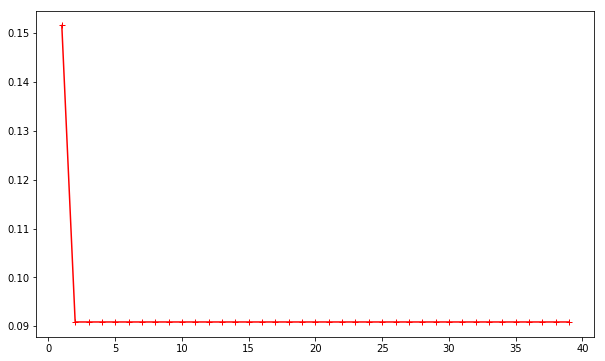

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40) , error_rate ,'r+-' )

<hr>
<b> We see that error rate is less for all Nearesr Neighbour value greater than 1
.: We take the lowest value 2 as the <i>n_neighbours</i> param value in the next knn model and check the classification report and confusion matrix
    <hr>

In [25]:
knnf = KNeighborsClassifier(n_neighbors=2)

In [26]:
knnf.fit(X_train, y_train)
knnpred = knnf.predict(X_test)

<hr>
## Using Support Vector Classifier
<hr>

<b> Grid Search is used to fine tune the SVC params and to find the best fit params </b>

In [38]:
 from sklearn.svm import SVC

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
params = {'C':[0.1 , 1 , 10 , 100 , 1000] , 'gamma': [0.1,0.01,0.001,1,0.0001]}

In [46]:
grid = GridSearchCV(SVC(),params, verbose = 23)

In [47]:
grid.fit( X_train , y_train )

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8695652173913043, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8636363636363636, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8636363636363636, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8695652173913043, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8636363636363636, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8636363636363636, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  1


[CV] C=100, gamma=0.1 ................................................
[CV] ....... C=100, gamma=0.1, score=0.8636363636363636, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ....... C=100, gamma=0.1, score=0.7272727272727273, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ....... C=100, gamma=0.01, score=0.782608695652174, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...... C=100, gamma=0.01, score=0.8636363636363636, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ...... C=100, gamma=0.01, score=0.7272727272727273, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.8695652173913043, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ..... C=100, gamma=0.001, score=0.8636363636363636, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 1, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=23)

In [44]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [45]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
predsvc = grid.predict(X_test)

<hr>
## Using Logistic Regression
as Target Class is binary i.e. either <i>Normal</i> or <i>Altered</i>]
<hr>

In [49]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

predlog = logreg.predict(X_test)

# Evaluation Of All Models Used

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

### 1. K-Nearest Neighbours

In [53]:
print(classification_report(knnpred , y_test))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        33
          1       0.00      0.00      0.00         0

avg / total       1.00      0.91      0.95        33



c:\users\arit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
print(confusion_matrix(knnpred , y_test))

[[30  3]
 [ 0  0]]


### 2. SVC

In [56]:
print(classification_report(predsvc , y_test))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        33
          1       0.00      0.00      0.00         0

avg / total       1.00      0.91      0.95        33



c:\users\arit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [57]:
print(confusion_matrix(predsvc , y_test))

[[30  3]
 [ 0  0]]


### 3. Logistic Regression

In [61]:
print(classification_report(predlog , y_test))

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        33
          1       0.00      0.00      0.00         0

avg / total       1.00      0.91      0.95        33



c:\users\arit\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [62]:
print(confusion_matrix(predlog , y_test))

[[30  3]
 [ 0  0]]
